<a href="https://colab.research.google.com/github/jeevanjagadish/ML-Predictions-Projects/blob/master/Covidtestanalysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url='https://raw.githubusercontent.com/jeevanjagadish/ML-Predictions-Projects/master/Covidtest/Cleaned-Data.csv'
df = pd.read_csv(url)

pd.pandas.set_option('display.max_columns',None)

In [4]:
display("Peeking into Data", df)

'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


Size of the data

In [6]:
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 27


Null values


In [7]:
display("NULL Values", df.isnull().sum())

'NULL Values'

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [8]:
display("Description",df.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


View

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [34]:
df.head
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition,Symptoms_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,"[1, 0, 0, 0]",9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,"[1, 0, 0, 0]",9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,"[1, 0, 0, 0]",9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,"[0, 1, 0, 0]",9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,"[0, 1, 0, 0]",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,"[0, 0, 0, 1]",0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,"[0, 0, 0, 1]",0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,"[0, 0, 1, 0]",0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,"[0, 0, 1, 0]",0


In [36]:

df.groupby(['Symptoms_Score'])
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition,Symptoms_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,"[1, 0, 0, 0]",9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,"[1, 0, 0, 0]",9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,"[1, 0, 0, 0]",9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,"[0, 1, 0, 0]",9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,"[0, 1, 0, 0]",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,"[0, 0, 0, 1]",0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,"[0, 0, 0, 1]",0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,"[0, 0, 1, 0]",0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,"[0, 0, 1, 0]",0


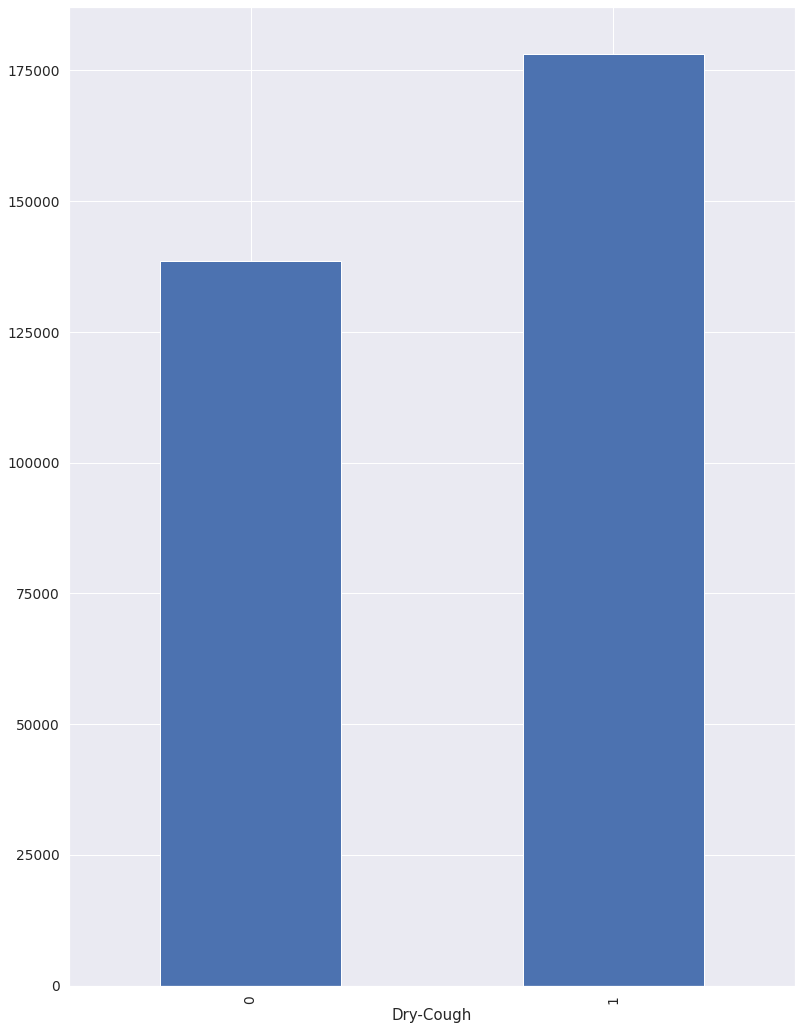

In [37]:
plt.clf()
df.groupby('Dry-Cough').size().plot(kind='bar')
plt.show()

<Figure size 936x1296 with 0 Axes>

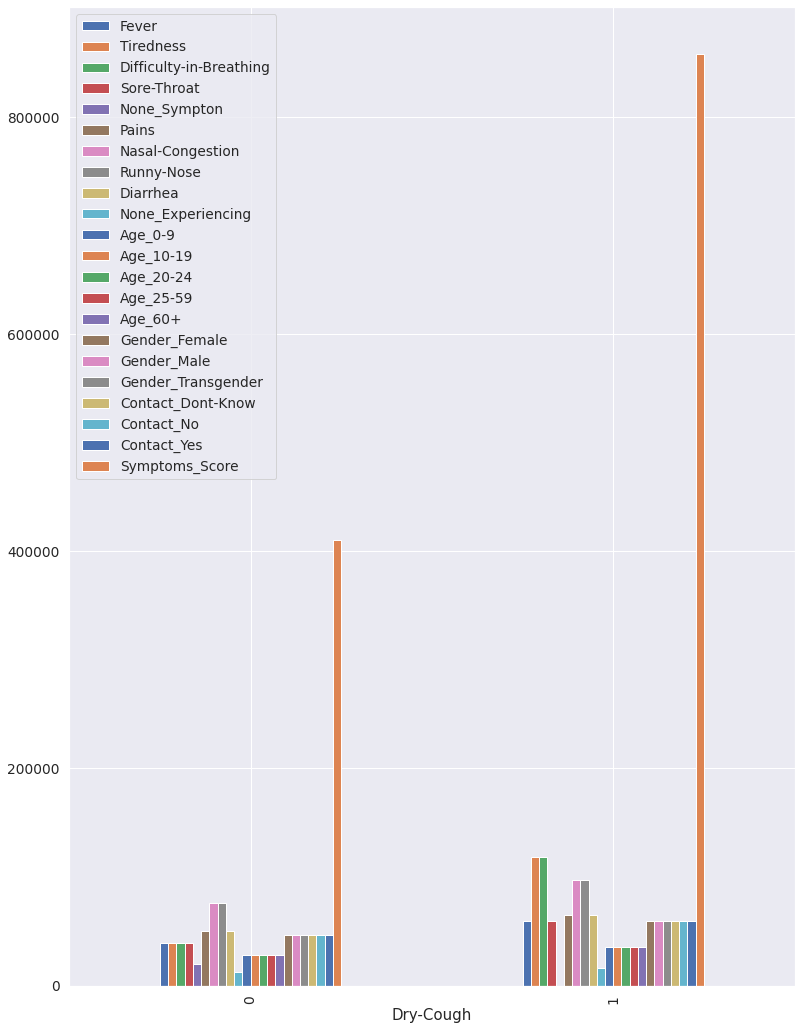

In [38]:
plt.clf()
df.groupby('Dry-Cough').sum().plot(kind='bar')
plt.show()

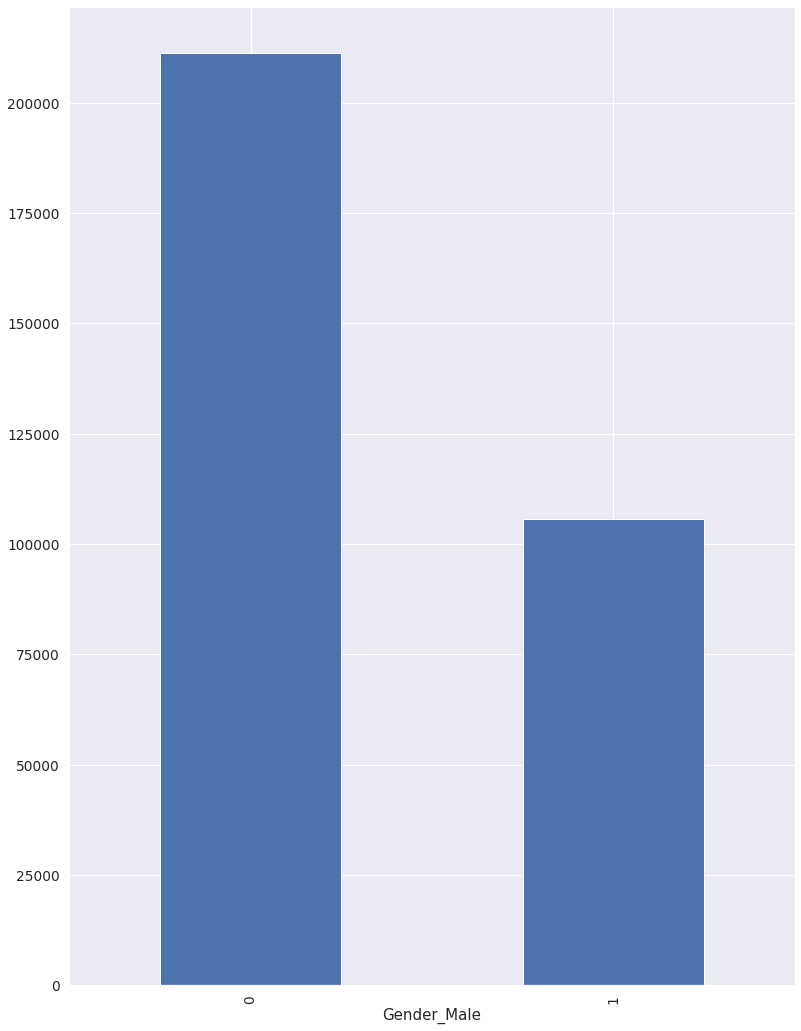

In [39]:
plt.clf()
df.groupby('Gender_Male').size().plot(kind='bar')
plt.show()

<Figure size 936x1296 with 0 Axes>

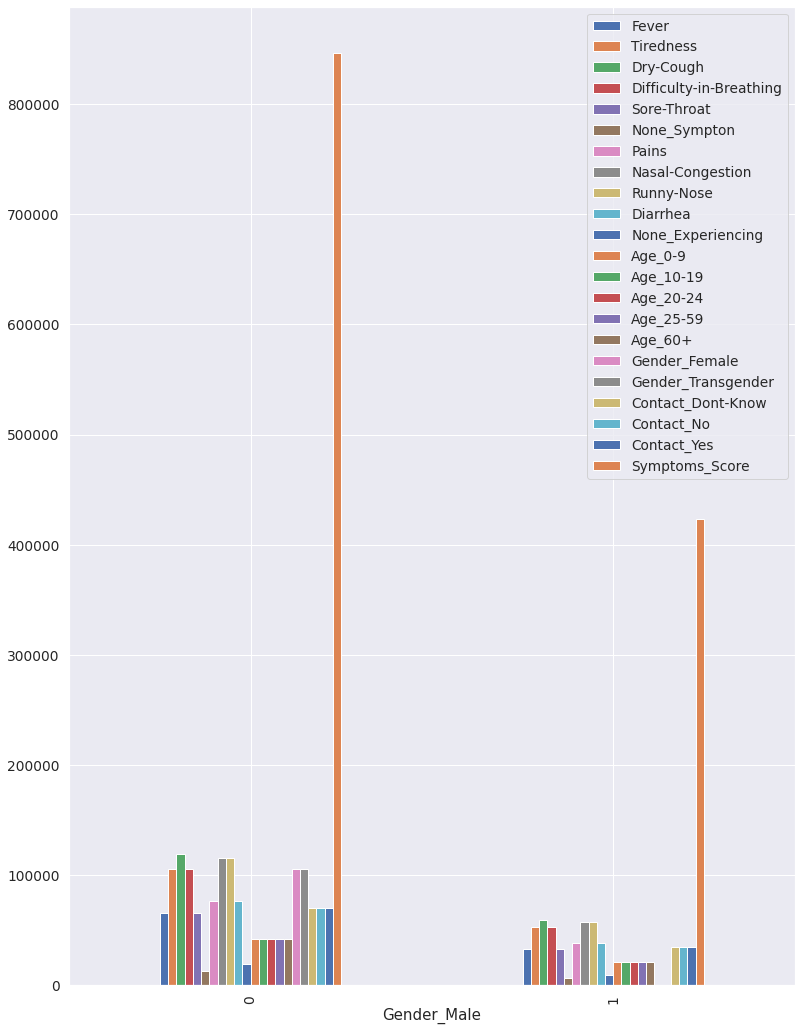

In [40]:
plt.clf()
df.groupby('Gender_Male').sum().plot(kind='bar')
plt.show()

In [42]:
df.head


<bound method NDFrame.head of         Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion

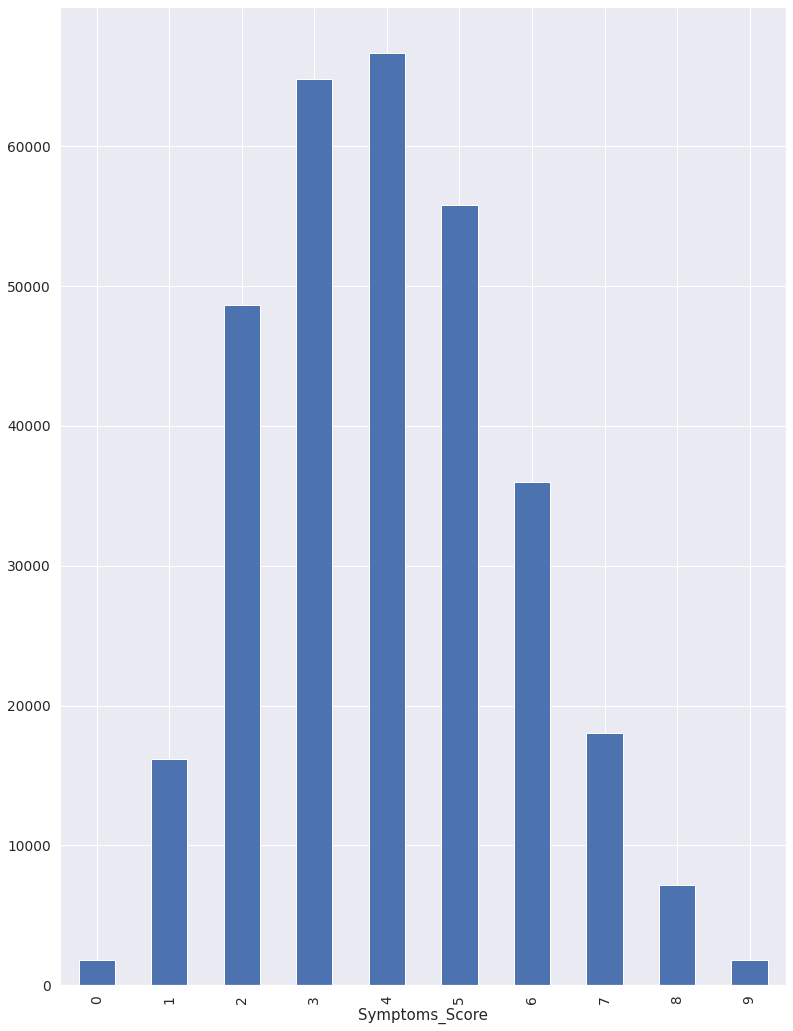

In [44]:
plt.clf()
df.groupby('Symptoms_Score').size().plot(kind='bar')
plt.show()
